In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
mnist = fetch_openml('mnist_784')
for key in mnist:
    print (key)

C:\Users\anton\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:67: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


data
target
frame
categories
feature_names
target_names
DESCR
details
url


In [4]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape):

(70000, 784) (70000,)


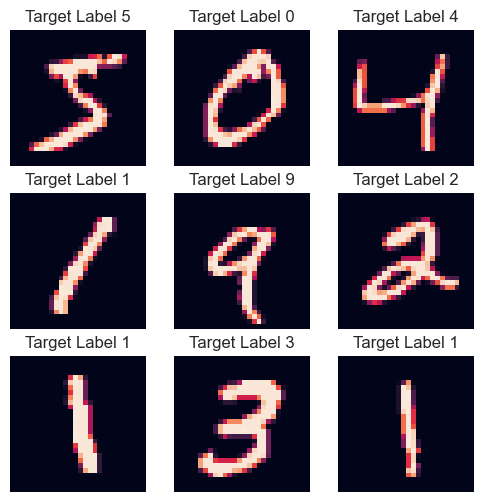

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(6,6) )
for i in range(9):
    image = np.array(X.iloc[i,:])
    image_pixels = image.reshape(28,28)
    plt.subplot(3,3,i+1)
    plt.imshow(image_pixels)
    plt.title(f'Target Label {y[i]}', fontsize=12)
    plt.axis('off')

In [8]:
scaler_train = StandardScaler()
scaler_train.fit(X)
X = scaler_train.transform(X)

In [11]:
pca = PCA(0.95)
pca.fit(X)
X_pca_reduceddimension = pca.transform(X)
pca.n_components_

332

In [12]:

X_pca_reduceddimension.shape

(70000, 332)

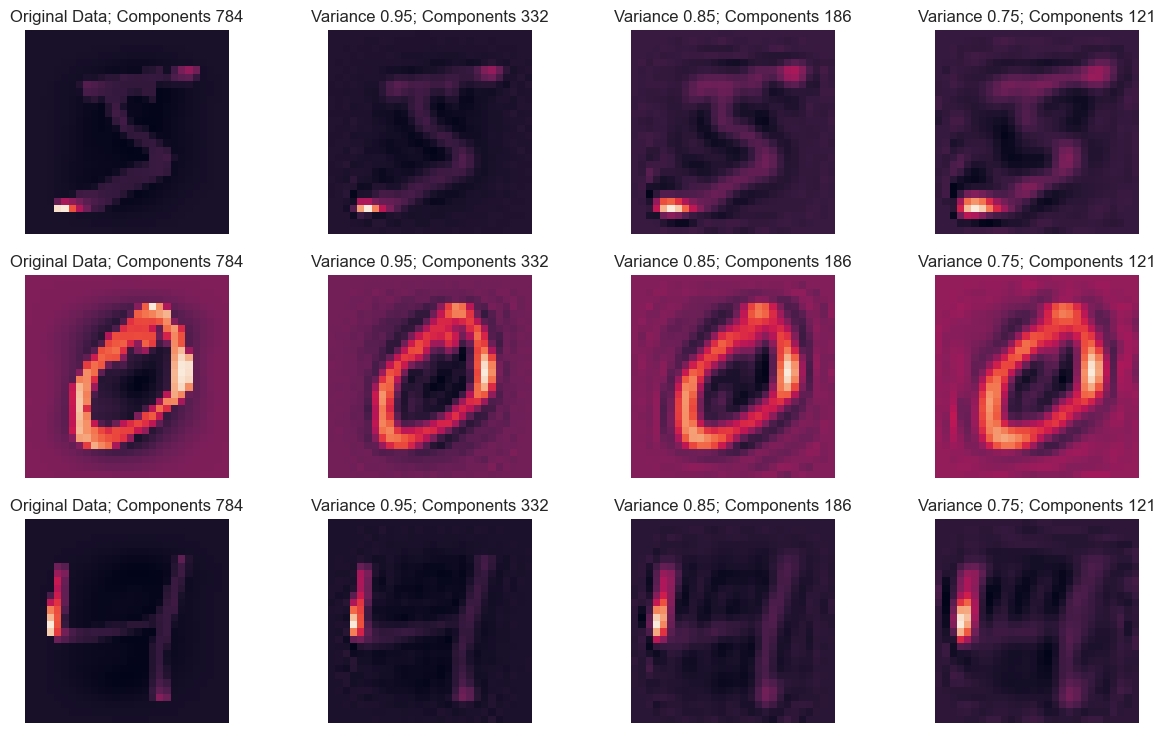

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,9))
m = 0
for i in range(3):
    for j in [1, 0.95, 0.85, 0.75]:
        m += 1
        pca = PCA(j)
        pca.fit(X)
        X_pca = pca.transform(X)
        components = pca.n_components_
        X_approx = pca.inverse_transform(X_pca)
        plt.subplot(3,4,m)
        if j == 1:
            image = X[i]
            plt.title(f'Original Data; Components 784')
        else: 
            image = X_approx[i]
            plt.title(f'Variance {j}; Components {components}')
        image_pixels = image.reshape(28,28)
        plt.axis('off')
        plt.imshow(image_pixels)